In [1]:
from sklearn import datasets,model_selection
import numpy as np

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
# getting the value fo X and y
n_samples = 10000
D=150
X_data=np.random.normal(0,1,(n_samples,D))
r=60
n=10
U_initial=np.random.normal(0,np.sqrt(1/r),(n,r)) # 60x10 matrix with normal distribution
V_initial=np.random.normal(0,1/D,(D,r)) # 150x60 matrix with elemnts normally 

def getY(x,U=U_initial,V=V_initial): # this function is executed for each sample
    temp=np.matmul(V.T,x) # 60x1 matrix
    temp2=np.maximum(temp,0) # 60x1 matrix
    temp3=np.matmul(U,temp2) # 10x1 matrix
    return temp3

# defining the labels
y_data=[]
for i in range(0,len(X_data)):
    y_data.append(getY(X_data[i]))
y_data=np.array(y_data)
    
#splitting the data into trainig and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X_data, y_data, test_size=0.20, random_state=42)

# getting mini batches
def getBatch(tempX, tempY, batch_size): #Take the training data and Batch size as input
    index = np.random.randint(0, len(tempX), batch_size) #Get the random index number
    X_batch = tempX[index]
    y_batch = tempY[index]
    return X_batch,y_batch

#Placeholders
X = tf.placeholder(tf.float32, shape =(None, D), name = 'X' ) #Place holder for training data X
y = tf.placeholder(tf.float32, shape =(None, n), name = 'y' ) #Place holder for training label data y
V = tf.Variable(tf.random_normal([D,r], 0, np.sqrt(1/D), seed=42), name='V') #Initialize the Random value for theta
U = tf.Variable(tf.random_normal([r,n], 0, np.sqrt(1/r), seed=42, name='U'))
#Operations
mul = tf.matmul(X, V, name='mul') # r X None
tempy = tf.nn.relu(mul,name='tempy') 
y_new=tf.matmul(tempy, U) # n X None
loss = tf.losses.mean_squared_error(y, y_new) #Loss function

learning_rate = 1
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_objective = optimizer.minimize(loss)

init = tf.global_variables_initializer()


epochs = 250
batch_size = 50
batches = int(np.ceil(n_samples / batch_size)) # as each epoch contains 10000 samples (n_samples=10000)

log_average=[]
with tf.Session() as sess:
    sess.run(init)

    for epoch in range(epochs):
        tempValue=0
        for i in range(batches):            
            X_batch, y_batch = getBatch(X_train, y_train, batch_size)
            sess.run(training_objective, feed_dict={X: X_batch, y: y_batch})
            loss_value = loss.eval({X: X_test, y: y_test})
            tempValue+=loss_value
            
        log_average.append(np.log(tempValue/batches)) # getting the average min-batch objective value for each epoch
        if epoch % 50 == 0:
            learning_rate-=0.5 # decreasing the value of learning-rate for every 50 epochs


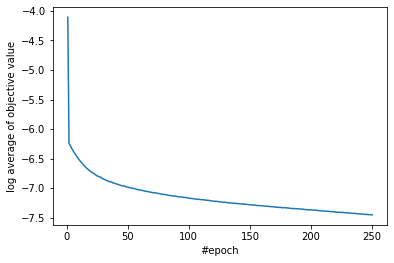

In [4]:
import matplotlib.pyplot as plt
epoch_no=np.arange(1,251)
plt.plot(epoch_no,log_average)
plt.xlabel('#epoch')
plt.ylabel('log average of objective value')
plt.show()

In [28]:
print('The log of average mini-batch objective value is as follows:\n')
for i in range(0,250):
    print('Epoch'+str(i+1)+'\t %f'%(log_average[i]))

The log of average mini-batch objective value is as follows:

Epoch1	 -4.063735
Epoch2	 -6.229058
Epoch3	 -6.266182
Epoch4	 -6.309399
Epoch5	 -6.350875
Epoch6	 -6.384584
Epoch7	 -6.428135
Epoch8	 -6.459190
Epoch9	 -6.491642
Epoch10	 -6.529188
Epoch11	 -6.558784
Epoch12	 -6.584712
Epoch13	 -6.616643
Epoch14	 -6.638091
Epoch15	 -6.658648
Epoch16	 -6.675973
Epoch17	 -6.701684
Epoch18	 -6.717529
Epoch19	 -6.736042
Epoch20	 -6.753885
Epoch21	 -6.767237
Epoch22	 -6.785454
Epoch23	 -6.797191
Epoch24	 -6.809536
Epoch25	 -6.825576
Epoch26	 -6.836704
Epoch27	 -6.845608
Epoch28	 -6.861028
Epoch29	 -6.868747
Epoch30	 -6.877515
Epoch31	 -6.889268
Epoch32	 -6.898437
Epoch33	 -6.905440
Epoch34	 -6.914010
Epoch35	 -6.918377
Epoch36	 -6.928550
Epoch37	 -6.933586
Epoch38	 -6.945657
Epoch39	 -6.957393
Epoch40	 -6.961023
Epoch41	 -6.964751
Epoch42	 -6.972607
Epoch43	 -6.976304
Epoch44	 -6.984443
Epoch45	 -6.989961
Epoch46	 -6.995709
Epoch47	 -7.001403
Epoch48	 -7.011206
Epoch49	 -7.011328
Epoch50	 -7.0148